In [1]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

d:\workdir\NLP_Project_AI23\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

In [3]:
model = TFAutoModelForSequenceClassification.from_pretrained("sarahai/movie-sentiment-analysis")

tokenizer = AutoTokenizer.from_pretrained("sarahai/movie-sentiment-analysis", truncation = True, max_length = 512, padding = True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [4]:

#classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [5]:
classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer)

Device set to use 0


In [6]:
df = pd.read_csv('..\data\IMDB Dataset.csv')

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df[df['sentiment'] == 'negative']

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
49994,This is your typical junk comedy.<br /><br />T...,negative
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
classifier([df['review'][7],
            df['review'][8],
            df['review'][10],
            df['review'][11],])

[{'label': 'LABEL_0', 'score': 0.9784377813339233},
 {'label': 'LABEL_0', 'score': 0.9851534366607666},
 {'label': 'LABEL_1', 'score': 0.8562858700752258},
 {'label': 'LABEL_0', 'score': 0.9255669713020325}]

Label_1 seems to be "positive" and Label_0 seems to be "negative":

In [10]:
classifier(['I really enjoyed this movie',
            'This movie was terrible',
            ])

[{'label': 'LABEL_1', 'score': 0.9531933069229126},
 {'label': 'LABEL_0', 'score': 0.9388782978057861}]

- Change the test's labels according to the model's labels;
- Perform train/test split;
- Apply the model on the test data to count Accuracy

In [11]:
df_lbld = df.copy()

In [12]:
df_lbld['sentiment'][df_lbld['sentiment'] == 'negative'] = 'LABEL_0'

C:\Users\Mary\AppData\Local\Temp\ipykernel_11916\2962544286.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_lbld['sentiment'][df_lbld['sentiment'] == 'negative'] = 'LABEL_0'


In [13]:
df_lbld['sentiment'][df_lbld['sentiment'] == 'positive'] = 'LABEL_1'

C:\Users\Mary\AppData\Local\Temp\ipykernel_11916\3487013271.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_lbld['sentiment'][df_lbld['sentiment'] == 'positive'] = 'LABEL_1'


In [14]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [15]:
df_lbld['review'] = df_lbld['review'].str.replace('"', ' \' ')

In [16]:
#df_lbld['review'] = df_lbld['review'].apply(lambda x: tokenizer.decode(tokenizer.encode(x, truncation=True, max_length=512)))

In [17]:
tokenized = tokenizer(df_lbld['review'].tolist(), truncation=True, padding=True, return_tensors='tf')

In [18]:
tokenized

{'input_ids': <tf.Tensor: shape=(50000, 512), dtype=int32, numpy=
array([[ 101, 2028, 1997, ...,    0,    0,    0],
       [ 101, 1037, 6919, ...,    0,    0,    0],
       [ 101, 1045, 2245, ...,    0,    0,    0],
       ...,
       [ 101, 1045, 2572, ...,    0,    0,    0],
       [ 101, 1045, 1005, ...,    0,    0,    0],
       [ 101, 2053, 2028, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(50000, 512), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [19]:
df_lbld['reviews'] = tokenized['input_ids'].numpy().tolist()
df_lbld['attention_mask'] = tokenized['attention_mask'].numpy().tolist()

In [20]:
df_lbld['reviews_decoded'] = df_lbld['reviews'].apply(lambda x: tokenizer.decode(x))

In [21]:
df_lbld.head()

,review,sentiment,reviews,attention_mask,reviews_decoded
0,One of the other reviewers has mentioned that ...,LABEL_1,"[101, 2028, 1997, 1996, 2060, 15814, 2038, 385...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[CLS] one of the other reviewers has mentioned...
1,A wonderful little production. <br /><br />The...,LABEL_1,"[101, 1037, 6919, 2210, 2537, 1012, 1026, 7987...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[CLS] a wonderful little production. < br / > ...
2,I thought this was a wonderful way to spend ti...,LABEL_1,"[101, 1045, 2245, 2023, 2001, 1037, 6919, 2126...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[CLS] i thought this was a wonderful way to sp...
3,Basically there's a family where a little boy ...,LABEL_0,"[101, 10468, 2045, 1005, 1055, 1037, 2155, 207...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[CLS] basically there's a family where a littl...
4,Petter Mattei's ' Love in the Time of Money '...,LABEL_1,"[101, 9004, 3334, 4717, 7416, 1005, 1055, 1005...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",[CLS] petter mattei's'love in the time of mone...


In [22]:
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'^\[CLS\]', '', regex=True)

In [23]:
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'\[SEP\]$', '', regex=True)

In [24]:
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'\[PAD\]', '', regex=True)
df_lbld['reviews_decoded'] = df_lbld['reviews_decoded'].str.replace(r'< br / >', '', regex=True)

In [25]:
df_lbld['reviews_decoded'][25003]

" the movie andaz apna apna in my books is the top 5 intelligent comedy movies ever made in bollywood perhaps even hollywood.   when the movie released i was a 8 year old and i heard it was a flop but i never understood till now why was it a flop... but let me tell you one thing... this movie would have more money by selling home cassettes and dvds and by showing in tv movie channels than any hit movie in theaters. this movie has been shown countless times in movie channels and i think even now the public love and the tv producers keep repeating the movie again and again. i personally have watched the entire movie more than 80 - 100 times and i still love it.....   the performance by both aamir khan as amar and salman khan as prem is mind blowing but i especially liked the performance of aamir khan as a street smart guy.... his dialogs in the movie are hilarious... the story is simple and heres how it goes.....   amar and prem are poor, lazy chaps and come from a poor family of tailors

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_lbld['reviews_decoded']
y = df_lbld['sentiment']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=False)

In [29]:
X_train.head()

0     one of the other reviewers has mentioned that...
1     a wonderful little production.   the filming ...
2     i thought this was a wonderful way to spend t...
3     basically there's a family where a little boy...
4     petter mattei's'love in the time of money'is ...
Name: reviews_decoded, dtype: object

In [30]:
X_test.head()

25000     this movie was bad from the start. the only p...
25001     god, i never felt so insulted in my whole lif...
25002     not being a fan of the coen brothers or georg...
25003     the movie andaz apna apna in my books is the ...
25004     i have to say i was really looking forward on...
Name: reviews_decoded, dtype: object

In [31]:
y_train.value_counts()

sentiment
LABEL_0    12526
LABEL_1    12474
Name: count, dtype: int64

In [32]:
y_test.value_counts()

sentiment
LABEL_1    12526
LABEL_0    12474
Name: count, dtype: int64

In [33]:
print(X_test.to_list()[3:5])

[" the movie andaz apna apna in my books is the top 5 intelligent comedy movies ever made in bollywood perhaps even hollywood.   when the movie released i was a 8 year old and i heard it was a flop but i never understood till now why was it a flop... but let me tell you one thing... this movie would have more money by selling home cassettes and dvds and by showing in tv movie channels than any hit movie in theaters. this movie has been shown countless times in movie channels and i think even now the public love and the tv producers keep repeating the movie again and again. i personally have watched the entire movie more than 80 - 100 times and i still love it.....   the performance by both aamir khan as amar and salman khan as prem is mind blowing but i especially liked the performance of aamir khan as a street smart guy.... his dialogs in the movie are hilarious... the story is simple and heres how it goes.....   amar and prem are poor, lazy chaps and come from a poor family of tailor

In [34]:
print(len(X_test.to_list()))

25000


In [35]:
result = classifier(X_test.to_list()[:3])

In [36]:
result

[{'label': 'LABEL_0', 'score': 0.9841868281364441},
 {'label': 'LABEL_0', 'score': 0.9817095398902893},
 {'label': 'LABEL_1', 'score': 0.9809734225273132}]

In [37]:
strange_entry = X_test[25003]

In [38]:
normal_entry = X_test[25004]

In [39]:
print (strange_entry)

 the movie andaz apna apna in my books is the top 5 intelligent comedy movies ever made in bollywood perhaps even hollywood.   when the movie released i was a 8 year old and i heard it was a flop but i never understood till now why was it a flop... but let me tell you one thing... this movie would have more money by selling home cassettes and dvds and by showing in tv movie channels than any hit movie in theaters. this movie has been shown countless times in movie channels and i think even now the public love and the tv producers keep repeating the movie again and again. i personally have watched the entire movie more than 80 - 100 times and i still love it.....   the performance by both aamir khan as amar and salman khan as prem is mind blowing but i especially liked the performance of aamir khan as a street smart guy.... his dialogs in the movie are hilarious... the story is simple and heres how it goes.....   amar and prem are poor, lazy chaps and come from a poor family of tailors 

In [40]:
print (normal_entry)

 i have to say i was really looking forward on watching this film and finding some new life in it that would separate it from most dull and overly crafted mexican films. i have no idea why but i trusted sexo, pudor y lagrimas to be the one to inject freshness and confidence to our non - existent industry. maybe it was because the soundtrack ( which i listened to before i saw the film ) sounded different from others, maybe it was because it dared to include newer faces ( apart from demian bichir who is always a favorite of mexican film directors ) and supposedly dealed within it's script with modern social behaviour, maybe because it's photography i saw in the trailers was bright and realistic instead of theatrical. the film turned out to be a major crowd pleaser, and a major letdown. what serrano actually deals here with is the very old fashioned'battle of the sexes'as in'all men are the same'and'why is it that all women... ;'blah, blah, blah. nothing new in it, not even that, it uses 

In [41]:
classifier(normal_entry)

[{'label': 'LABEL_1', 'score': 0.9177201390266418}]

In [42]:
classifier('''inputs=
          I have to say I was really looking forward on watching this film and finding some new life in it that would separate it from most dull and overly crafted mexican films. I have no idea why but I trusted Sexo, Pudor y Lagrimas to be the one to inject freshness and confidence to our non-existent industry. Maybe it was because the soundtrack(which I listened to before I saw the film) sounded different from others, maybe it was because it dared to include newer faces(apart from Demian Bichir who is always a favorite of mexican film directors) and supposedly dealed within it's script with modern social behaviour, maybe because it's photography I saw in the trailers was bright and realistic instead of theatrical. The film turned out to be a major crowd pleaser, and a major letdown. What Serrano actually deals here with is the very old fashioned "battle of the sexes" as in "all men are the same" and "why is it that all women...;" blah,blah,blah. Nothing new in it, not even that, it uses so much common ground and clichè that it eventually mocks itself without leaving any valuable reflexion on the female/male condition. Full of usual tramps on the audience like safe gags about the clichès I talked about before(those always work, always) and screaming performances(it is a well acted film in it's context)..and by screaming I mean, literally. The at first more compelling characters played by Monica Dionne and Demian Bichir turn out to be according to Serrano the more pathetic ones. I completely disagree with Serrano, they shouldn't have been treated that way only to serve as marionettes for his lesson to come through...he made sure we got HIS message and completely destroyed their roles that were the only solid ground in which this story could have stood. Anyway, it is after all, a very entertaining film at times and you will probably have a good time seeing it (if you accept to be manipulated by it) 
           ''')

[{'label': 'LABEL_1', 'score': 0.959822952747345}]

In [43]:
classifier('''
           I have to say I was really looking forward on watching this film and finding some new life in it that would separate it from most dull and overly crafted mexican films. I have no idea why but I trusted Sexo, Pudor y Lagrimas to be the one to inject freshness and confidence to our non-existent industry. Maybe it was because the soundtrack(which I listened to before I saw the film) sounded different from others, maybe it was because it dared to include newer faces(apart from Demian Bichir who is always a favorite of mexican film directors) and supposedly dealed within it's script with modern social behaviour, maybe because it's photography I saw in the trailers was bright and realistic instead of theatrical. The film turned out to be a major crowd pleaser, and a major letdown. What Serrano actually deals here with is the very old fashioned "battle of the sexes" as in "all men are the same" and "why is it that all women...;" blah,blah,blah. Nothing new in it, not even that, it uses so much common ground and clichè that it eventually mocks itself without leaving any valuable reflexion on the female/male condition. Full of usual tramps on the audience like safe gags about the clichès I talked about before(those always work, always) and screaming performances(it is a well acted film in it's context)..and by screaming I mean, literally. The at first more compelling characters played by Monica Dionne and Demian Bichir turn out to be according to Serrano the more pathetic ones. I completely disagree with Serrano, they shouldn't have been treated that way only to serve as marionettes for his lesson to come through...he made sure we got HIS message and completely destroyed their roles that were the only solid ground in which this story could have stood. Anyway, it is after all, a very entertaining film at times and you will probably have a good time seeing it (if you accept to be manipulated by it)
           ''')

[{'label': 'LABEL_1', 'score': 0.9427478313446045}]

In [44]:
type(strange_entry)

str

In [45]:
type(normal_entry)

str

In [46]:
classifier(strange_entry)

[{'label': 'LABEL_1', 'score': 0.9773173332214355}]

In [47]:
X_test.to_list()[14]

"'man of the year'tells the story of tom dobbs ( robin williams ) a political comedian ( like jon stewart or stephen colbert ) who has his own television show. on his show he talks about all sorts of things but his main focus are political issues which he is very opinionated about. one day on his show, a fan from the audience raises the idea that dobbs should run for president of the united states. after that episode aired, millions flocked to the web to create various petitions and voice their opinions on why dobbs would make a great candidate for the president for the united states. a few weeks later, dobbs decides to run for president and low and behold wins the election. everything seems to be going as planned until a woman by the name of eleanor green ( laura linney ) shows up and starts some controversy regarding his position. a funny yet serious political thriller ensues   man anyone walking into this film expecting to see a brainless comedy will surely be disappointed. i always

In [48]:
results = classifier(X_test.to_list())

In [50]:
results

[{'label': 'LABEL_0', 'score': 0.9841868281364441},
 {'label': 'LABEL_0', 'score': 0.9817095398902893},
 {'label': 'LABEL_1', 'score': 0.9809734225273132},
 {'label': 'LABEL_1', 'score': 0.9773173332214355},
 {'label': 'LABEL_1', 'score': 0.9177201390266418},
 {'label': 'LABEL_1', 'score': 0.9777098894119263},
 {'label': 'LABEL_0', 'score': 0.9544014930725098},
 {'label': 'LABEL_1', 'score': 0.9528210759162903},
 {'label': 'LABEL_1', 'score': 0.9757754802703857},
 {'label': 'LABEL_0', 'score': 0.9814581274986267},
 {'label': 'LABEL_1', 'score': 0.9808835387229919},
 {'label': 'LABEL_1', 'score': 0.9799204468727112},
 {'label': 'LABEL_1', 'score': 0.9722450375556946},
 {'label': 'LABEL_1', 'score': 0.9724222421646118},
 {'label': 'LABEL_1', 'score': 0.9742550849914551},
 {'label': 'LABEL_1', 'score': 0.9799519181251526},
 {'label': 'LABEL_0', 'score': 0.9807958006858826},
 {'label': 'LABEL_1', 'score': 0.9022883176803589},
 {'label': 'LABEL_0', 'score': 0.985633909702301},
 {'label': 'L

In [51]:
results_df = pd.DataFrame(results)
results_df.to_csv(r'..\data\results_IMDBmod.csv', index=False)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np


In [53]:

# Generate predictions
y_pred = [result['label'] for result in results]

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=['LABEL_0', 'LABEL_1'])
print(conf_matrix)


[[10505  1969]
 [  899 11627]]


In [54]:
import seaborn as sns

import matplotlib.pyplot as plt


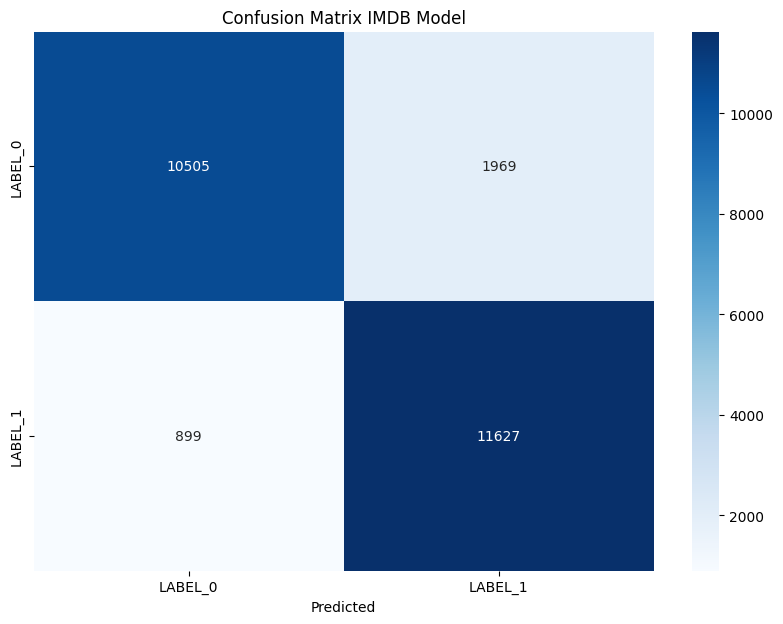

In [57]:

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LABEL_0', 'LABEL_1'], yticklabels=['LABEL_0', 'LABEL_1'])
plt.xlabel('Predicted')
plt.title('Confusion Matrix IMDB Model')
plt.show()

In [59]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Save accuracy score to CSV
for_report = pd.DataFrame({'Model': ['sarahai/movie-sentiment-analysis'], 'Notes': ['50/50 train-test split'], 'Accuracy': [accuracy]})
for_report.to_csv(r'..\results\for_report.csv', index=False)

Accuracy: 0.88528
